## Algorithm mode duty cycle

## Missing Data Problem

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('display.max_rows',100)

In [5]:
rawdata=pd.read_csv("test.csv", delimiter=";" )
rawdata.rename(columns={' ':'Time'},inplace=True)
rawdata['Time']=rawdata['Time'].str.replace('[^\d\:]','')
rawdata['Time']=pd.to_datetime(rawdata.Time)

## Change Date

In [6]:
percent_batt=100

In [7]:
batt=percent_batt*96

## Change Percent Batt

In [8]:
rawdata.set_index('Time', inplace=True)

In [9]:
rawdata.drop(['Total consumption / Mean values [W] ',
       'Grid feed-in / Mean values [W] ',
       'Direct consumption / Mean values [W]  ',
       'Battery charging / Mean values [W]  ',
       'Target value / Mean values [W]  ', 'Output value / Mean values [W]  '],axis=1,inplace=True)


In [10]:
rawdata.loc[rawdata.loc[pd.IndexSlice[:,'Battery discharging / Mean values [W] ']]==' ']
deleteindex=rawdata.loc[rawdata.loc[pd.IndexSlice[:,'Battery discharging / Mean values [W] ']]==' '].index
rawdata.drop(deleteindex,inplace=True)

In [11]:
for i in rawdata.columns:
    rawdata[i].fillna('0',inplace=True)
    rawdata[i]=rawdata[i].apply(lambda x: x.replace(' ', '0'))
    rawdata[i]=rawdata[i].str.replace('\D','').astype(int)

In [12]:
rawdata.columns

Index(['Direct consumption / Mean values [W] ',
       'Battery discharging / Mean values [W] ',
       'External energy supply / Mean values [W] ',
       'PV power generation / Mean values [W]  '],
      dtype='object')

In [13]:
rawdata['Consumption']=rawdata['Direct consumption / Mean values [W] ']+rawdata['Battery discharging / Mean values [W] ']+rawdata['External energy supply / Mean values [W] ']
rawdata.rename(columns={'PV power generation / Mean values [W]  ':'Generation'},inplace=True)
rawdata.drop(['Direct consumption / Mean values [W] ', 'Battery discharging / Mean values [W] ','External energy supply / Mean values [W] '],axis=1,inplace=True)

Have Data with Generation and Consumption

In [14]:
rawdata

,Generation,Consumption
Time,,
2019-02-12 00:15:00,0,1869
2019-02-12 00:30:00,0,1881
2019-02-12 00:45:00,0,1648
2019-02-12 01:00:00,0,1806
2019-02-12 01:15:00,0,1839
2019-02-12 01:30:00,0,1781
2019-02-12 01:45:00,0,1492
2019-02-12 02:00:00,0,1725
2019-02-12 02:15:00,0,1246


In [15]:
rawdata.index
Consumption_afterPV=[]
Charge=[]
for i in rawdata.index:
    if rawdata.loc[i,'Generation']>=rawdata.loc[i,'Consumption']:
        Charge.append(rawdata.loc[i,'Generation']-rawdata.loc[i,'Consumption'])
        Consumption_afterPV.append(0)
    else:
        Charge.append(0)
        Consumption_afterPV.append(rawdata.loc[i,'Consumption']-rawdata.loc[i,'Generation'])    

In [16]:
rawdata['Charge']=Charge
rawdata['Consumption_afterPV']=Consumption_afterPV

In [17]:
totalcharge=rawdata['Charge'].sum()/4
totalcharge

3313.75

In [18]:
datanotstart=rawdata[rawdata.Generation==0]
dataonlystart=rawdata[rawdata.Generation!=0]
start_time=dataonlystart.index[0]
consumption_night=rawdata.loc[:start_time,'Consumption'].sum()/4

In [19]:
if totalcharge+batt>9600:
    discharge_only_at_night=1
else:
    discharge_only_at_night=0

In [20]:
discharge_only_at_night

1

In [21]:
if batt-consumption_night>0.6*9600:
    batt_start=batt-consumption
else:
    batt_start=0.6*9600
batt_start

5760.0

In [22]:
contactor=[]

In [23]:
for i in rawdata[rawdata.index[0]:start_time].drop(start_time).index:
    if discharge_only_at_night==1:
        contactor.append(1)
    else:
        contactor.append(0)

In [24]:
len(contactor)

26

In [25]:
for i in rawdata[start_time:].index:
    if rawdata.loc[i,'Charge'] > 0:
        contactor.append(1)
    elif batt_start+totalcharge <= 9600:
        contactor.append(0)
    else:
        contactor.append(1)

In [26]:
rawdata['Contactor']=contactor

In [27]:
rawdata

,Generation,Consumption,Charge,Consumption_afterPV,Contactor
Time,,,,,
2019-02-12 00:15:00,0,1869,0,1869,1
2019-02-12 00:30:00,0,1881,0,1881,1
2019-02-12 00:45:00,0,1648,0,1648,1
2019-02-12 01:00:00,0,1806,0,1806,1
2019-02-12 01:15:00,0,1839,0,1839,1
2019-02-12 01:30:00,0,1781,0,1781,1
2019-02-12 01:45:00,0,1492,0,1492,1
2019-02-12 02:00:00,0,1725,0,1725,1
2019-02-12 02:15:00,0,1246,0,1246,1


In [32]:
remain=totalcharge*4

In [33]:
rawdata['Discharge']=rawdata['Contactor']*0
for i in rawdata.index:
    if rawdata.loc[i,'Contactor']==1 and rawdata.loc[i,'Charge']==0:
        if remain >= rawdata.loc[i,'Consumption_afterPV']:
            rawdata.loc[i,'Discharge']= rawdata.loc[i,'Consumption_afterPV']
            remain=remain- rawdata.loc[i,'Consumption_afterPV']
        else:
            rawdata.loc[i,'Discharge']=remain
            remain=0
        

In [34]:
rawdata

,Generation,Consumption,Charge,Consumption_afterPV,Contactor,Discharge
Time,,,,,,
2019-02-12 00:15:00,0,1869,0,1869,1,1869.0
2019-02-12 00:30:00,0,1881,0,1881,1,1881.0
2019-02-12 00:45:00,0,1648,0,1648,1,1648.0
2019-02-12 01:00:00,0,1806,0,1806,1,1806.0
2019-02-12 01:15:00,0,1839,0,1839,1,1839.0
2019-02-12 01:30:00,0,1781,0,1781,1,1781.0
2019-02-12 01:45:00,0,1492,0,1492,1,1492.0
2019-02-12 02:00:00,0,1725,0,1725,1,939.0
2019-02-12 02:15:00,0,1246,0,1246,1,0.0


In [36]:
%config InlineBackend.figure_format='retina'

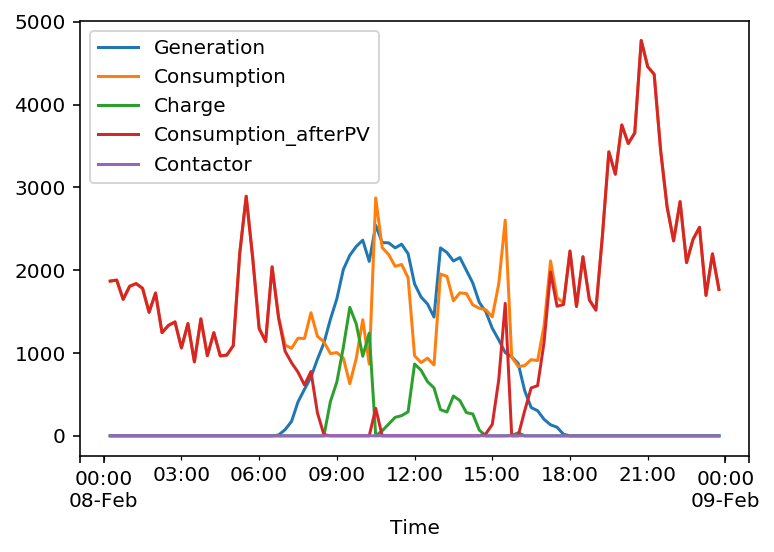

In [37]:
rawdata.plot(kind='line')

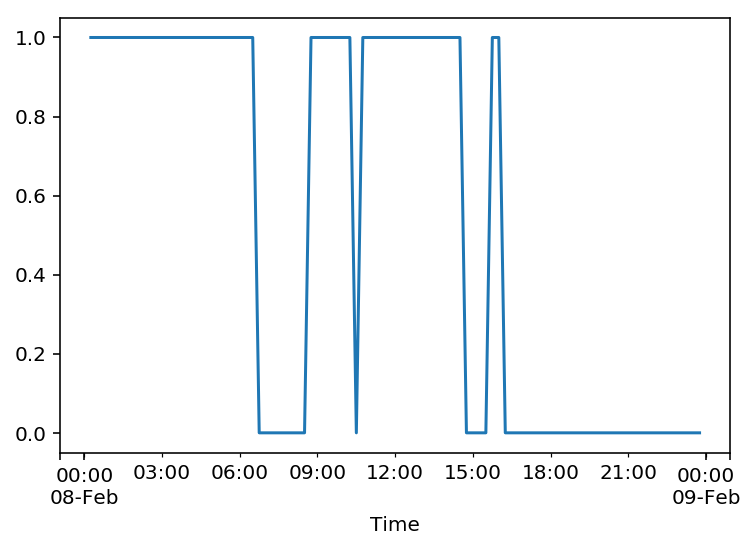

In [40]:
rawdata['Contactor'].plot(kind='line')